100%|██████████| 170498071/170498071 [00:07<00:00, 22474875.64it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1: Train Acc = 48.41%, Test Acc = 60.50%
Epoch 2: Train Acc = 61.72%, Test Acc = 65.18%
Epoch 3: Train Acc = 67.76%, Test Acc = 69.14%
Epoch 4: Train Acc = 71.43%, Test Acc = 69.80%
Epoch 5: Train Acc = 74.68%, Test Acc = 72.14%
Epoch 6: Train Acc = 77.40%, Test Acc = 72.74%
Epoch 7: Train Acc = 79.77%, Test Acc = 73.60%
Epoch 8: Train Acc = 82.07%, Test Acc = 72.97%
Epoch 9: Train Acc = 84.14%, Test Acc = 73.97%
Epoch 10: Train Acc = 86.16%, Test Acc = 73.09%
Epoch 11: Train Acc = 87.71%, Test Acc = 73.58%
Epoch 12: Train Acc = 89.21%, Test Acc = 73.41%
Epoch 13: Train Acc = 90.28%, Test Acc = 73.91%
Epoch 14: Train Acc = 91.61%, Test Acc = 73.86%
Epoch 15: Train Acc = 92.46%, Test Acc = 73.53%
Epoch 16: Train Acc = 92.87%, Test Acc = 73.21%
Epoch 17: Train Acc = 93.65%, Test Acc = 73.59%
Epoch 18: Train Acc = 94.22%, Test Acc = 73.23%
Epoch 19: Train Acc = 94.57%, Test Acc = 73.02%
Epoch 20

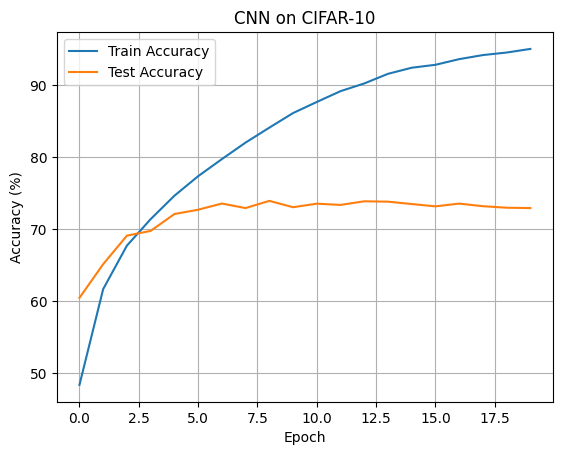

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 하이퍼파라미터
BATCH_SIZE = 128
EPOCHS = 20
LR = 0.001
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# CIFAR-10 전처리 및 불러오기
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 표준화
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

# 기본 CNN 모델
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))   # -> [B, 32, 16, 16]
        x = self.pool(self.relu(self.conv2(x)))   # -> [B, 64, 8, 8]
        x = x.view(x.size(0), -1)                 # Flatten
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# 학습 및 테스트
def train_model(model, trainloader, testloader, epochs, lr):
    model.to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_acc, test_acc = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        train_acc.append(100. * correct / total)

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                correct += predicted.eq(labels).sum().item()
                total += labels.size(0)

        test_acc.append(100. * correct / total)
        print(f"Epoch {epoch+1}: Train Acc = {train_acc[-1]:.2f}%, Test Acc = {test_acc[-1]:.2f}%")

    return train_acc, test_acc

# 모델 학습
model = SimpleCNN()
train_acc, test_acc = train_model(model, trainloader, testloader, EPOCHS, LR)

# 정확도 시각화
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('CNN on CIFAR-10')
plt.legend()
plt.grid(True)
plt.show()


개선

In [ ]:

# ✅ 데이터 전처리 정의
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# ✅ 데이터셋 로딩
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

# ✅ 학습 정확도 평가용 (augmentation 없는 trainset)
eval_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform_test)
eval_trainloader = torch.utils.data.DataLoader(eval_trainset, batch_size=BATCH_SIZE, shuffle=False)

# ✅ 모델 정의는 이전과 동일 (생략 가능)
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.dropout1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.dropout2 = nn.Dropout(0.25)

        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.dropout3 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.dropout1(self.relu(self.bn1(self.conv1(x)))))
        x = self.pool(self.dropout2(self.relu(self.bn2(self.conv2(x)))))
        x = x.view(x.size(0), -1)
        x = self.dropout3(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# ✅ 학습 함수 (eval_trainloader 사용)
def train_model(model, trainloader, eval_trainloader, testloader, epochs, lr):
    model.to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    train_acc, test_acc = [], []

    for epoch in range(epochs):
        model.train()
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # ✅ 학습 정확도 평가 (고정된 trainset으로)
        model.eval()
        with torch.no_grad():
            correct, total = 0, 0
            for inputs, labels in eval_trainloader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                correct += predicted.eq(labels).sum().item()
                total += labels.size(0)
            train_accuracy = 100. * correct / total
            train_acc.append(train_accuracy)

        # ✅ 테스트 정확도 평가
        with torch.no_grad():
            correct, total = 0, 0
            for inputs, labels in testloader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                correct += predicted.eq(labels).sum().item()
                total += labels.size(0)
            test_accuracy = 100. * correct / total
            test_acc.append(test_accuracy)

        scheduler.step()
        print(f"Epoch {epoch+1:02d}: Train Acc = {train_accuracy:.2f}%, Test Acc = {test_accuracy:.2f}%")

    return train_acc, test_acc

# ✅ 모델 생성 및 실행
model = ImprovedCNN()
train_acc, test_acc = train_model(model, trainloader, eval_trainloader, testloader, EPOCHS, LR)

# ✅ 시각화
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Improved CNN on CIFAR-10 (Corrected Train Accuracy)')
plt.legend()
plt.grid(True)
plt.show()


Files already downloaded and verified
Files already downloaded and verified
Epoch 01: Train Acc = 44.58%, Test Acc = 45.21%
Epoch 02: Train Acc = 50.54%, Test Acc = 50.54%
Epoch 03: Train Acc = 58.67%, Test Acc = 58.15%
Epoch 04: Train Acc = 58.73%, Test Acc = 58.81%


#### ✅ 개선 요소 및 기대 효과

| 개선 요소             | 기대 효과                                |
|----------------------|-------------------------------------------|
| 데이터 증강 (Augmentation) | 이미지 다양성 증가 → **일반화 성능 향상** |
| Dropout (Conv 포함)   | **과적합 억제** → 테스트 정확도 향상      |
| Batch Normalization  | **학습 안정화**, 수렴 속도 향상           |
| Learning Rate Scheduler (StepLR) | 학습 후반 정확도 **정체 완화**, 과적합 방지 |
